In [1]:
import librosa
import numpy as np
from sklearn import preprocessing
from scipy.signal import savgol_filter
from librosa import feature, effects
from scipy.signal import resample
np.random.seed(0)

#to turn warnings off
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

freq=25
import parselmouth
from parselmouth.praat import call

filelist=np.load('filelist_1100.mat.npy')
newlabels=np.load('labels_1100.mat.npy')
print(np.shape(filelist)[0])
shp=16384

scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler_std= preprocessing.StandardScaler()
scaler_max= preprocessing.MaxAbsScaler()

def get_feat(y, sr):
    S = np.abs(librosa.stft(y))
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10) #20 x 39
    feat= np.mean(mfccs,1)
    feat=np.append(feat, np.max(mfccs,1))
    feat=np.append(feat, np.min(mfccs,1))
    ##print(np.shape(feat), np.shape(mfccs))  

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) #12 x 39
    feat = np.append(feat, np.mean(chroma_stft,1))
    #feat=np.append(feat, np.max(chroma_stft,1))
    
    #print(np.shape(feat))
    
    p2 = librosa.feature.poly_features(S=S, order=4)
    #feat=np.append(feat, np.mean(p2,1))
    #feat=np.append(feat, np.max(p2,1))
    #feat=np.append(feat, np.min(p2,1))
    ##print(np.shape(feat))
    
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    feat=np.append(feat, np.mean(tonnetz,1))
    #feat=np.append(feat, np.max(tonnetz))
    #feat=np.append(feat, np.min(tonnetz))
    
    #print(np.shape(feat))
    
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr) # 39
    feat=np.append(feat, np.mean(spec_cent))
    feat=np.append(feat, np.max(spec_cent))
    #feat=np.append(feat, np.min(spec_cent))
    ##print(np.shape(feat))
    
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr) #1x39
    feat=np.append(feat, np.mean(spec_bw))
    feat=np.append(feat, np.max(spec_bw))
    feat=np.append(feat, np.min(spec_bw))
    ##print(np.shape(feat))
    
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)  #39
    feat=np.append(feat, np.mean(rolloff))
    feat=np.append(feat, np.max(rolloff))
    feat=np.append(feat, np.min(rolloff))
    ##print(np.shape(feat))
    
    zcr = librosa.feature.zero_crossing_rate(y) #2002
    feat=np.append(feat, np.mean(zcr))
    #feat=np.append(feat, np.max(zcr))
    #feat=np.append(feat, np.min(zcr))
    ##print(np.shape(feat))
    
   

    return feat

sidx=0
def get_allfeat(y, sr, nframes=33):
    S = np.abs(librosa.stft(y))
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20) #20 x 39
    mfccs = resample(mfccs, nframes, axis=1)
    #mfccs=mfccs[:,sidx:nframes]
    #print('mfccs ',np.shape(mfccs))
    feat= np.concatenate(mfccs)
    #feat=np.append(feat, np.max(mfccs,1))
    #feat=np.append(feat, np.min(mfccs,1))
    ##print(np.shape(feat), np.shape(mfccs))  

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) #12 x 39
    chroma_stft = resample(chroma_stft, nframes, axis=1)
    #chroma_stft=chroma_stft[:,sidx:nframes]
    #print('chroma_stft ',np.shape(chroma_stft))
    feat = np.append(feat, np.concatenate(chroma_stft))
    #feat=np.append(feat, np.max(chroma_stft,1))
    #feat=np.append(feat, np.min(chroma_stft,1))
    
    #print(np.shape(feat))
    
    p2 = librosa.feature.poly_features(S=S, order=3)
    p2=p2[:,sidx:nframes]
    #feat=np.append(feat, np.concatenate(p2))
    #print('p2 ',np.shape(p2))
    #feat=np.append(feat, np.max(p2,1))
    #feat=np.append(feat, np.min(p2,1))
    ##print(np.shape(feat))
    
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    tonnetz = resample(tonnetz, nframes, axis=1)
    #tonnetz=tonnetz[:,sidx:nframes]
    #print('tonnetz ',np.shape(tonnetz))
    feat=np.append(feat, np.concatenate(tonnetz))
    #feat=np.append(feat, np.max(tonnetz))
    #feat=np.append(feat, np.min(tonnetz))
    
    #print(np.shape(feat))
    S, phase = librosa.magphase(librosa.stft(y))
    S_power = S ** 2
    flatness=librosa.feature.spectral_flatness(S=S_power, power=1.0)
    flatness = resample(flatness, nframes, axis=1)
    feat=np.append(feat, np.concatenate(flatness))
    #feat=np.append(feat, np.max(flatness))
    
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr) # 39
    spec_cent = resample(spec_cent, nframes, axis=1)
    #spec_cent=spec_cent[:,sidx:nframes]
    #print('spec_cent ',np.shape(spec_cent))
    feat=np.append(feat, np.concatenate(spec_cent))
    #feat=np.append(feat, np.max(spec_cent))
    #feat=np.append(feat, np.min(spec_cent))
    ##print(np.shape(feat))
    
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr) #1x39
    spec_bw = resample(spec_bw, nframes, axis=1)
    #spec_bw=spec_bw[:,sidx:nframes]
    #print('spec_bw ',np.shape(spec_bw))
    feat=np.append(feat, np.concatenate(spec_bw))
    #feat=np.append(feat, np.max(spec_bw))
    #feat=np.append(feat, np.min(spec_bw))
    ##print(np.shape(feat))
    
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)  #39
    rolloff = resample(rolloff, nframes, axis=1)
    #rolloff=rolloff[:,sidx:nframes]
    #print('rolloff ',np.shape(rolloff))
    feat=np.append(feat, np.concatenate(rolloff))
    #feat=np.append(feat, np.max(rolloff))
    #feat=np.append(feat, np.min(rolloff))
    ##print(np.shape(feat))
    
    zcr = librosa.feature.zero_crossing_rate(y) #2002
    #feat=np.append(feat, np.mean(zcr))
    #feat=np.append(feat, np.max(zcr))
    #feat=np.append(feat, np.min(zcr))
    ##print(np.shape(feat))
    
   

    return feat


train_num=832
Xfeat=[]
for i in range(1349):#(1349):
    afile=filelist[i]+'_audio.wav'
    aud , sr = librosa.load(afile)

    if(1):
        aud, index=effects.trim(np.float32(aud), top_db=freq)
        #either this (not so good)
        #aud =effects.time_stretch(np.float32(aud), np.shape(aud)[0]/shp)
        #or this
        #sound = parselmouth.Sound(afile)
        sound = parselmouth.Sound(aud.T, sampling_frequency=sr)
        #create manipulation object
        #time step=0, max # formants=5, max formant freq =5500, window len = 0.025, preemphasis=50
        manipulation = call(sound, "To Manipulation",0.01, 50, 200)

        ##extract durationtier and add a duration point
        duration_tier = call(manipulation, "Extract duration tier")
        duration = call(duration_tier, "Add point", sound.end_time, shp/(np.shape(aud)[0]*1.0))

        #replace the duration tier in the manipulation object
        call([duration_tier, manipulation], "Replace duration tier")

        #Publish resynthesis
        sound_octave_up = call(manipulation, "Get resynthesis (overlap-add)")

        formants = call(sound_octave_up, "To Formant (burg)", 0.0,5, 5500, 0.025,50) #create a praat pitch object
        formant=[]
        t=0.0
        for time in range(10):
            t+=0.0625
            f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
            f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
            f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
            f4 = call(formants, "Get value at time", 4, t, 'Hertz', 'Linear')
            formant.extend([f1/f2,f1/f3, f1/f4, f2/f3, f2/f4 , f3/f4])
            

        aud=sound_octave_up.values.T


        aud=np.reshape(aud[0:shp],(shp,1))
        #standarize the data to be between -1 to +1
        
        aud=scaler_std.fit_transform(aud)
    y=scaler_max.fit_transform(aud)
    
    
    
    #feat =get_feat(y[:,0],16000)
    feat =get_allfeat(y[:,0],sr)
    temp=[]
    temp.extend(feat)
    #formants have nan in them, replace them with zeros or interpolate them
    if(np.any(np.isnan(formant))):
        formant=np.nan_to_num(formant,0)
    temp.extend(formant)

    Xfeat.append(temp)
    #summarize over frames
    #mean median

print(np.shape(Xfeat))
if 1:
    allfeat = scaler_std.fit_transform(np.array(Xfeat))
else:
    allfeat = Xfeat
print(np.shape(feat), np.shape(allfeat))


#mfccs  (10, 30)
#chroma_stft  (12, 30)
#p2  (5, 45)
#tonnetz  (6, 30)
#spec_cent  (1, 30)
#spec_bw  (1, 30)
#rolloff  (1, 45)
#mfccs  (10, 30)
#chroma_stft  (12, 30)
#p2  (5, 33)
#tonnetz  (6, 30)
#spec_cent  (1, 30)
#spec_bw  (1, 30)
#rolloff  (1, 33)

1349
(1349, 1446)
(1386,) (1349, 1446)


In [2]:
#train classifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "Ada Boost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma='auto', C=0.1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=16),
    RandomForestClassifier(max_depth=16, n_estimators=150, max_features=10),
    MLPClassifier(hidden_layer_sizes=(100,),alpha=0.01, max_iter=1000,early_stopping=True, batch_size=64),
    AdaBoostClassifier()]

num=695 #832
#normalize the features
X_train=allfeat[0:num]
y_train=newlabels[0:num]

X_test=allfeat[860:1349]
y_test=newlabels[860:1349]


for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)

Nearest Neighbors 0.8404907975460123
Linear SVM 0.9611451942740287
RBF SVM 0.5460122699386503
Gaussian Process 0.1554192229038855
Decision Tree 0.7750511247443763
Random Forest 0.9427402862985685
Neural Net 0.901840490797546
Ada Boost 0.36809815950920244


In [11]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "Ada Boost",
         "Naive Bayes", "QDA"]

In [3]:
#step 4: evaluation on training data
# generating test file for  generated test data, can be skipped

#optical flow or SAN landmark
opt=1
#stretch audio or pad audio
pad_audio=0

# clear style only
string='_diff_1_spec_mse_fftlen_bestmodel_all3_C3_clearOnly_aligned_interp_video_stretch_audio_jawmouth_832_framecount_80_melW_0__mouth'

gl=0


if (pad_audio==1):
    string=string+'_pad'
#else:
    #filename=filename+'stretch_spec'
    #string=string+'stretch_spec_fftlen'
    



print(np.shape(filelist)[0])

testfeat=[]
testlab=[]
for j in range(695):#488, 860, 695
    testid=0+j #860
    if gl:
        afile='test_output/new_gl_audio_'+string+str(testid)+'_'+ newlabels[testid][0]+'_112257.wav' 
    else:
        afile='test_output/new_fixed_combined_audio_'+string+str(testid)+'_'+ newlabels[testid][0]+'.wav'
    y , sr = librosa.load(afile)
    sound = parselmouth.Sound(y.T, sampling_frequency=sr)
    formants = call(sound_octave_up, "To Formant (burg)", 0.0,5, 5500, 0.025,50) #create a praat pitch object
    formant=[]
    t=0.0
    for time in range(10):
        t+=0.0625
        f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
        f4 = call(formants, "Get value at time", 4, t, 'Hertz', 'Linear')
        formant.extend([f1/f2,f1/f3, f1/f4, f2/f3, f2/f4 , f3/f4])


    #print([afile,newlabels[testid][0]], sr)
    #feat = get_feat(y,16000)
    feat = get_allfeat(y,sr)
    temp=[]
    temp.extend(feat)
    #formants have nan in them, replace them with zeros or interpolate them
    if(np.any(np.isnan(formant))):
        formant=np.nan_to_num(formant,0)

    temp.extend(formant)

    testfeat.append(temp)
    testlab.append(newlabels[testid][0])


if 1:
    X_test2 = scaler_std.fit_transform(np.array(testfeat))
else:
    X_test2 = testfeat

y_test2=testlab



allpred=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test2)
    allpred.append(pred)
    score = clf.score(X_test2, y_test2)
    print(name, score)
    
    

1349
Nearest Neighbors 0.6345323741007194
Linear SVM 0.6258992805755396
RBF SVM 0.4489208633093525
Gaussian Process 0.1553956834532374
Decision Tree 0.40575539568345326
Random Forest 0.6302158273381295
Neural Net 0.5942446043165468
Ada Boost 0.40575539568345326


In [4]:

#on test data
np.random.seed(4)

newstyles=np.load('styles_1100.mat.npy')
newstyles=newstyles-1 #change the range from 1-2 to 0-1



test_idx1 = np.where(newstyles[860:]==0)[0]
test_idx2 = np.where(newstyles[860:]==1)[0]



alltestfeat=[]
alltestlab=[]
#loop over two styles
for st in range(2):
    testfeat=[]
    testlab=[]
    if (st==0):
        test_idx = test_idx1 #plain
    else:
        test_idx= test_idx2 #clear
        
    for j in range(np.shape(test_idx)[0]):#488, 860, 695
        testid=test_idx[j]#860
        
        if gl:
            afile='test_output/new_gl_audio_'+string+str(testid)+'_'+ newlabels[testid][0]+'_112257.wav' 
        else:
            afile='test_output/new_fixed_combined_audio_'+string+str(testid)+'_'+ newlabels[testid][0]+'.wav'


        #afile='test_output/new_fixed_combined_audio_'+string+str(testid)+'_'+ newlabels[testid][0]+'.wav'
        y , sr = librosa.load(afile)
        sound = parselmouth.Sound(y.T, sampling_frequency=sr)
        formants = call(sound_octave_up, "To Formant (burg)", 0.0,5, 5500, 0.025,50) #create a praat pitch object
        formant=[]
        t=0.0
        for time in range(10):
            t+=0.0625
            f1 = call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
            f2 = call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
            f3 = call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
            f4 = call(formants, "Get value at time", 4, t, 'Hertz', 'Linear')
            formant.extend([f1/f2,f1/f3, f1/f4, f2/f3, f2/f4 , f3/f4])


        #print([afile,newlabels[testid][0]], sr)
        #feat = get_feat(y,16000)
        feat = get_allfeat(y,sr)
        temp=[]
        temp.extend(feat)
        #formants have nan in them, replace them with zeros or interpolate them
        if(np.any(np.isnan(formant))):
            formant=np.nan_to_num(formant,0)

        temp.extend(formant)

        testfeat.append(temp)
        testlab.append(newlabels[testid][0])

        alltestfeat.append(temp)
        alltestlab.append(newlabels[testid][0])



    if 1:
        X_test2 = scaler_std.fit_transform(np.array(testfeat))
    else:
        X_test2 = testfeat

    y_test2=testlab



    allpred=[]
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test2)
        allpred.append(pred)
        score = clf.score(X_test2, y_test2)
        
        if (st==0 and name == "Random Forest"):
            data1=confusion_matrix(y_test2, pred,labels=["could", "cooed", "kid","cud", "cod", "keyed"])
        elif(st==1 and name == "Random Forest"):
            data2=confusion_matrix(y_test2, pred,labels=["could", "cooed", "kid","cud", "cod", "keyed"])


        print(name, 1-score)

Nearest Neighbors 0.6486486486486487
Linear SVM 0.6177606177606177
RBF SVM 0.44015444015444016
Gaussian Process 0.16602316602316602
Decision Tree 0.26640926640926643
Random Forest 0.6177606177606177
Neural Net 0.5714285714285714
Ada Boost 0.4362934362934363
Nearest Neighbors 0.6441717791411042
Linear SVM 0.6278118609406953
RBF SVM 0.4212678936605317
Gaussian Process 0.1574642126789366
Decision Tree 0.2740286298568507
Random Forest 0.5950920245398773
Neural Net 0.5725971370143149
Ada Boost 0.3946830265848671


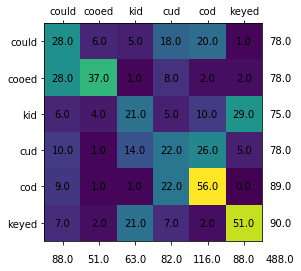

In [30]:
# clear

#mouth only

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
clf=RandomForestClassifier(max_depth=16, n_estimators=150, max_features=10)
clf.fit(X_train, y_train)
pred = clf.predict(X_test2)
gt=y_test2
data=confusion_matrix(gt, pred,labels=["could", "cooed", "kid","cud", "cod", "keyed"])


#0.1606280193236715 695 133 828

fig = plt.figure()
ax = fig.add_subplot(111)
labels=["could", "cooed", "kid","cud", "cod", "keyed"]
ax.matshow(data)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

for i in range(6):
    ax.text( i,6, '{:0.1f}'.format(np.sum(data,0)[i]), ha='center', va='center')
for j in range(6):
    ax.text( 6, j, '{:0.1f}'.format(np.sum(data,1)[j]), ha='center', va='center')

ax.text(6, 6, '{:0.1f}'.format(np.sum(data)), ha='center', va='center')



    
plt.show()

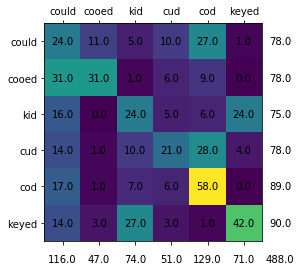

In [14]:
#mouth + jaw
np.random.seed(1)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
clf=RandomForestClassifier(max_depth=16, n_estimators=150, max_features=10)
clf.fit(X_train, y_train)
pred = clf.predict(X_test2)
gt=y_test2
data=confusion_matrix(gt, pred,labels=["could", "cooed", "kid","cud", "cod", "keyed"])


#0.1606280193236715 695 133 828

fig = plt.figure()
ax = fig.add_subplot(111)
labels=["could", "cooed", "kid","cud", "cod", "keyed"]
ax.matshow(data)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

for i in range(6):
    ax.text( i,6, '{:0.1f}'.format(np.sum(data,0)[i]), ha='center', va='center')
for j in range(6):
    ax.text( 6, j, '{:0.1f}'.format(np.sum(data,1)[j]), ha='center', va='center')

ax.text(6, 6, '{:0.1f}'.format(np.sum(data)), ha='center', va='center')



    
plt.show()

(488,) (489, 1446) (489,) (229,)


Text(0.5, 1.05, 'Training: Plain, Testing: Clear')

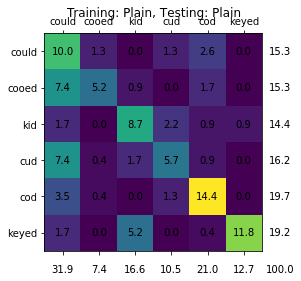

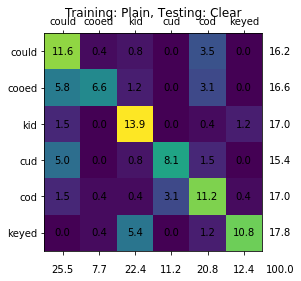

In [6]:
#create conf mat 
np.random.seed(137)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
clf=RandomForestClassifier(max_depth=16, n_estimators=150, max_features=10)
clf.fit(X_train, y_train)


X_test2 = scaler_std.fit_transform(np.array(alltestfeat))
y_test2 = alltestlab


pred = clf.predict(X_test2)
score = clf.score(X_test2, y_test2)
print(score)
gt=y_test2

#style comparison for test data


newstyles=np.load('styles_1100.mat.npy')
newstyles=newstyles-1 #change the range from 1-2 to 0-1


teststyle = newstyles[860:1348]

sidx1=np.where(teststyle==1)
sidx2=np.where(teststyle==0)
sidx1=sidx1[0]
sidx2=sidx2[0]
gt=np.array(gt)
pred=np.array(pred)


print(np.shape(teststyle), np.shape(testfeat), np.shape(pred), np.shape(sidx1))

#data1=confusion_matrix(gt[sidx1], pred[sidx1],labels=["could", "cooed", "kid","cud", "cod", "keyed"])
#data2=confusion_matrix(gt[sidx2], pred[sidx2],labels=["could", "cooed", "kid","cud", "cod", "keyed"])

data1=100*data1/np.shape(sidx1)[0]

data2=100*data2/np.shape(sidx2)[0]


#0.1606280193236715 695 133 828

fig = plt.figure()
ax = fig.add_subplot(111)
labels=["could", "cooed", "kid","cud", "cod", "keyed"]
ax.matshow(data1)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
for (i, j), z in np.ndenumerate(data1):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',color="white" if z < 4 else "black")

for i in range(6):
    ax.text( i,6, '{:0.1f}'.format(np.sum(data1,0)[i]), ha='center', va='center')
for j in range(6):
    ax.text( 6, j, '{:0.1f}'.format(np.sum(data1,1)[j]), ha='center', va='center')

ax.text(6, 6, '{:0.1f}'.format(np.sum(data1)), ha='center', va='center')
plt.title('Training: Clear, Testing: Plain')


fig2 = plt.figure()
ax = fig2.add_subplot(111)
labels=["could", "cooed", "kid","cud", "cod", "keyed"]
ax.matshow(data2)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
for (i, j), z in np.ndenumerate(data2):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',color="white" if z < 4 else "black")

for i in range(6):
    ax.text( i,6, '{:0.1f}'.format(np.sum(data2,0)[i]), ha='center', va='center')
for j in range(6):
    ax.text( 6, j, '{:0.1f}'.format(np.sum(data2,1)[j]), ha='center', va='center')

ax.text(6, 6, '{:0.1f}'.format(np.sum(data2)), ha='center', va='center')
plt.title('Training: Clear, Testing: Clear')

